## This notebook assumes you have the following packages installed in your conda environment.

In [1]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [30]:
df = pd.read_csv('asl.csv')
df.shape

(2768, 2)

In [33]:
df_new = df[['EntryID', 'Code']]
df_new.head()

,EntryID,Code
0,&=arms-cross,J_01_098
1,&=clap,J_02_076
2,&=raise-hand,H_02_48
3,&=sigh,H_03_86
4,1_dollar,C_02_025


In [19]:
df_new.to_csv('asl.csv')

In [33]:
# input_file = open ('links.json')
# json_array = json.load(input_file)
# links =[]

# for item in json_array:
#     link_details = {"target":None, "source":None, "num_matched": None}
#     link_details['target'] = item['target']
#     link_details['source'] = item['source']
#     links.append(link_details)

# print(len(links))

21688


In [34]:
df = pd.DataFrame(links)
df.shape

(21688, 3)

In [35]:
df_small = df.iloc[:1500]
df_small.shape

(1500, 3)

In [36]:
df2 = df_small[['source', 'target']]
print(df2.head())
df2.to_csv('small_edges.csv')

     source    target
0  H_03_102  A_01_042
1  J_02_012  A_01_042
2  J_02_038  A_01_042
3  J_02_085  A_01_042
4  B_02_089  A_01_043


## Community Analysis

In [3]:
edges_df = pd.read_csv('scc-data/new-data/default-neighbors.csv')
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,B_03_025,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,SignType.2.0
2,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
3,A_01_002,F_02_88,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
4,A_01_002,H_03_4,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0


In [35]:
len(edges_df['target'].unique())

1771

In [4]:
edges_df.shape

(14826, 6)

/Users/shreya/anaconda3/envs/asl/lib/python3.7/site-packages/networkx-2.3-py3.7.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


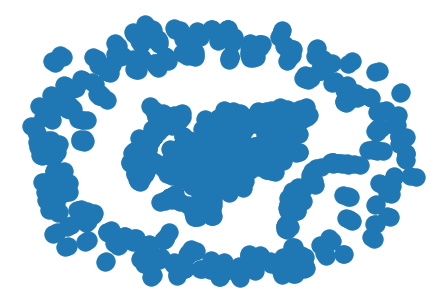

In [6]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [25]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g
c = list(greedy_modularity_communities(G))

In [27]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

1771


In [37]:
len(g.edges('E_03_42'))


3

In [39]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

1771


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,B_03_025,0
3,C_03_023,0
4,F_02_88,0


In [40]:
edges_df.head()
# 'B_01_062' in df_with_groupids['Code'].unique()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,B_03_025,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,SignType.2.0
2,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
3,A_01_002,F_02_88,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
4,A_01_002,H_03_4,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0


In [48]:
# get edges only where source and target nodes belong to a valid community for now
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

1771
(14826, 6)
(14826, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,B_03_025,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,SignType.2.0
2,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
3,A_01_002,F_02_88,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
4,A_01_002,H_03_4,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0


In [130]:
df_new.head()
df_new.shape

(2768, 2)

In [43]:

df_merged = pd.merge(df_new, df_with_groupids,how='left', on=['Code'])
df_merged.head(20)

,EntryID,Code,group_id
0,&=arms-cross,J_01_098,NaN
1,&=clap,J_02_076,NaN
2,&=raise-hand,H_02_48,NaN
3,&=sigh,H_03_86,NaN
4,1_dollar,C_02_025,NaN
5,5_dollars,B_01_062,0.0
6,8_hour,C_02_055,NaN
7,9_oclock,C_02_080,92.0
8,A-LINE_BOB,K_03_127,NaN
9,a_little_bit,H_03_25,10.0


In [50]:
#Will assign all NaN's same color for now. That's okay.

df_merged.head()
unique_community_ids = df_merged['group_id'].unique()
color_dict = []
for groupid in unique_community_ids:
    #generate a random color
    color = randomcolor.RandomColor().generate()[0]
    color_dict.append({'group_id': groupid, 'color_code': color})
    
color_dict

[{'group_id': nan, 'color_code': '#b426e0'},
 {'group_id': 0.0, 'color_code': '#e9bef7'},
 {'group_id': 92.0, 'color_code': '#bc1828'},
 {'group_id': 10.0, 'color_code': '#d82026'},
 {'group_id': 90.0, 'color_code': '#f99fc0'},
 {'group_id': 166.0, 'color_code': '#fcee83'},
 {'group_id': 148.0, 'color_code': '#0554b5'},
 {'group_id': 33.0, 'color_code': '#3bef89'},
 {'group_id': 123.0, 'color_code': '#0c0466'},
 {'group_id': 26.0, 'color_code': '#f99363'},
 {'group_id': 62.0, 'color_code': '#f9c989'},
 {'group_id': 19.0, 'color_code': '#d5e216'},
 {'group_id': 47.0, 'color_code': '#db60d3'},
 {'group_id': 2.0, 'color_code': '#95f4e8'},
 {'group_id': 12.0, 'color_code': '#54b0b7'},
 {'group_id': 63.0, 'color_code': '#060d9e'},
 {'group_id': 30.0, 'color_code': '#98f2c9'},
 {'group_id': 71.0, 'color_code': '#d8c0f7'},
 {'group_id': 1.0, 'color_code': '#153ced'},
 {'group_id': 89.0, 'color_code': '#340e9e'},
 {'group_id': 5.0, 'color_code': '#d142a1'},
 {'group_id': 9.0, 'color_code': '#1

In [52]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head(20)


(2768, 4)


,EntryID,Code,group_id,color_code
0,&=arms-cross,J_01_098,NaN,#b426e0
1,&=clap,J_02_076,NaN,#b426e0
2,&=raise-hand,H_02_48,NaN,#b426e0
3,&=sigh,H_03_86,NaN,#b426e0
4,1_dollar,C_02_025,NaN,#b426e0
5,5_dollars,B_01_062,0.0,#e9bef7
6,8_hour,C_02_055,NaN,#b426e0
7,9_oclock,C_02_080,92.0,#bc1828
8,A-LINE_BOB,K_03_127,NaN,#b426e0
9,a_little_bit,H_03_25,10.0,#d82026


In [53]:
df_merged_with_color.shape

(2768, 4)

In [153]:
edges_for_community_nodes_df_small = edges_for_community_nodes_df.iloc[:7000]
print(edges_for_community_nodes_df_small.shape)
edges_for_community_nodes_df_small.to_csv('edges_for_community_nodes.csv')
edges_for_community_nodes_df_small
edges_for_community_nodes_df_small.head(10)

(7000, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,B_03_025,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,SignType.2.0
2,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
3,A_01_002,F_02_88,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
4,A_01_002,H_03_4,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
5,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
6,A_01_003,A_01_011,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
7,A_01_003,A_01_030,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
8,A_01_003,B_01_033,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
9,A_01_003,D_02_047,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [55]:
edges_df.to_csv('edges_all.csv')


In [56]:
df_merged_with_color.to_csv('nodes_all.csv')

## Get Num Connections

/Users/shreya/anaconda3/envs/asl/lib/python3.7/site-packages/networkx-2.3-py3.7.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


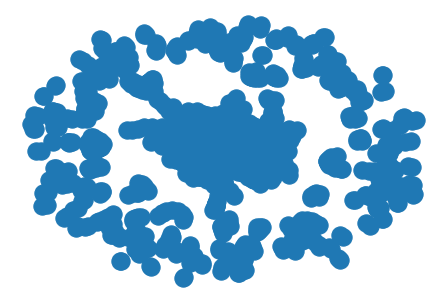

In [157]:
g_7000 = nx.from_pandas_edgelist(edges_for_community_nodes_df_small, source='source', target='target') 
nx.draw(g)

In [163]:
df_merged_with_color['num_edges'] = df.apply(lambda row: len(g_7000.edges(row['Code'])), axis=1)
df_merged_with_color.head(10)


,EntryID,Code,group_id,color_code,num_edges
0,5_dollars,B_01_062,0,#ad66cc,0
1,afternoon,J_01_040,0,#ad66cc,0
2,all_of_sudden,H_01_96,0,#ad66cc,0
3,basketball,A_03_045,0,#ad66cc,0
4,baster_1,G_03_53,0,#ad66cc,0
5,beg,F_02_37,0,#ad66cc,6
6,blue,C_02_062,0,#ad66cc,0
7,bottom_2,F_01_66,0,#ad66cc,2
8,butterfly,A_03_056,0,#ad66cc,0
9,bye,E_01_58,0,#ad66cc,2


In [164]:
df_merged_with_color['num_edges'].value_counts()

0     744
1     259
2     159
3      98
4      79
5      71
6      58
7      46
8      31
10     25
11     23
9      19
20     18
19     17
21     13
13     12
14     11
12     10
48     10
22      9
27      9
17      7
24      7
45      6
15      5
29      5
16      5
18      4
23      3
47      2
26      2
28      2
31      1
46      1
Name: num_edges, dtype: int64

In [165]:
df_merged_with_color.to_csv('nodes_with_colors.csv')

/Users/shreya/anaconda3/envs/asl/lib/python3.7/site-packages/networkx-2.3-py3.7.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


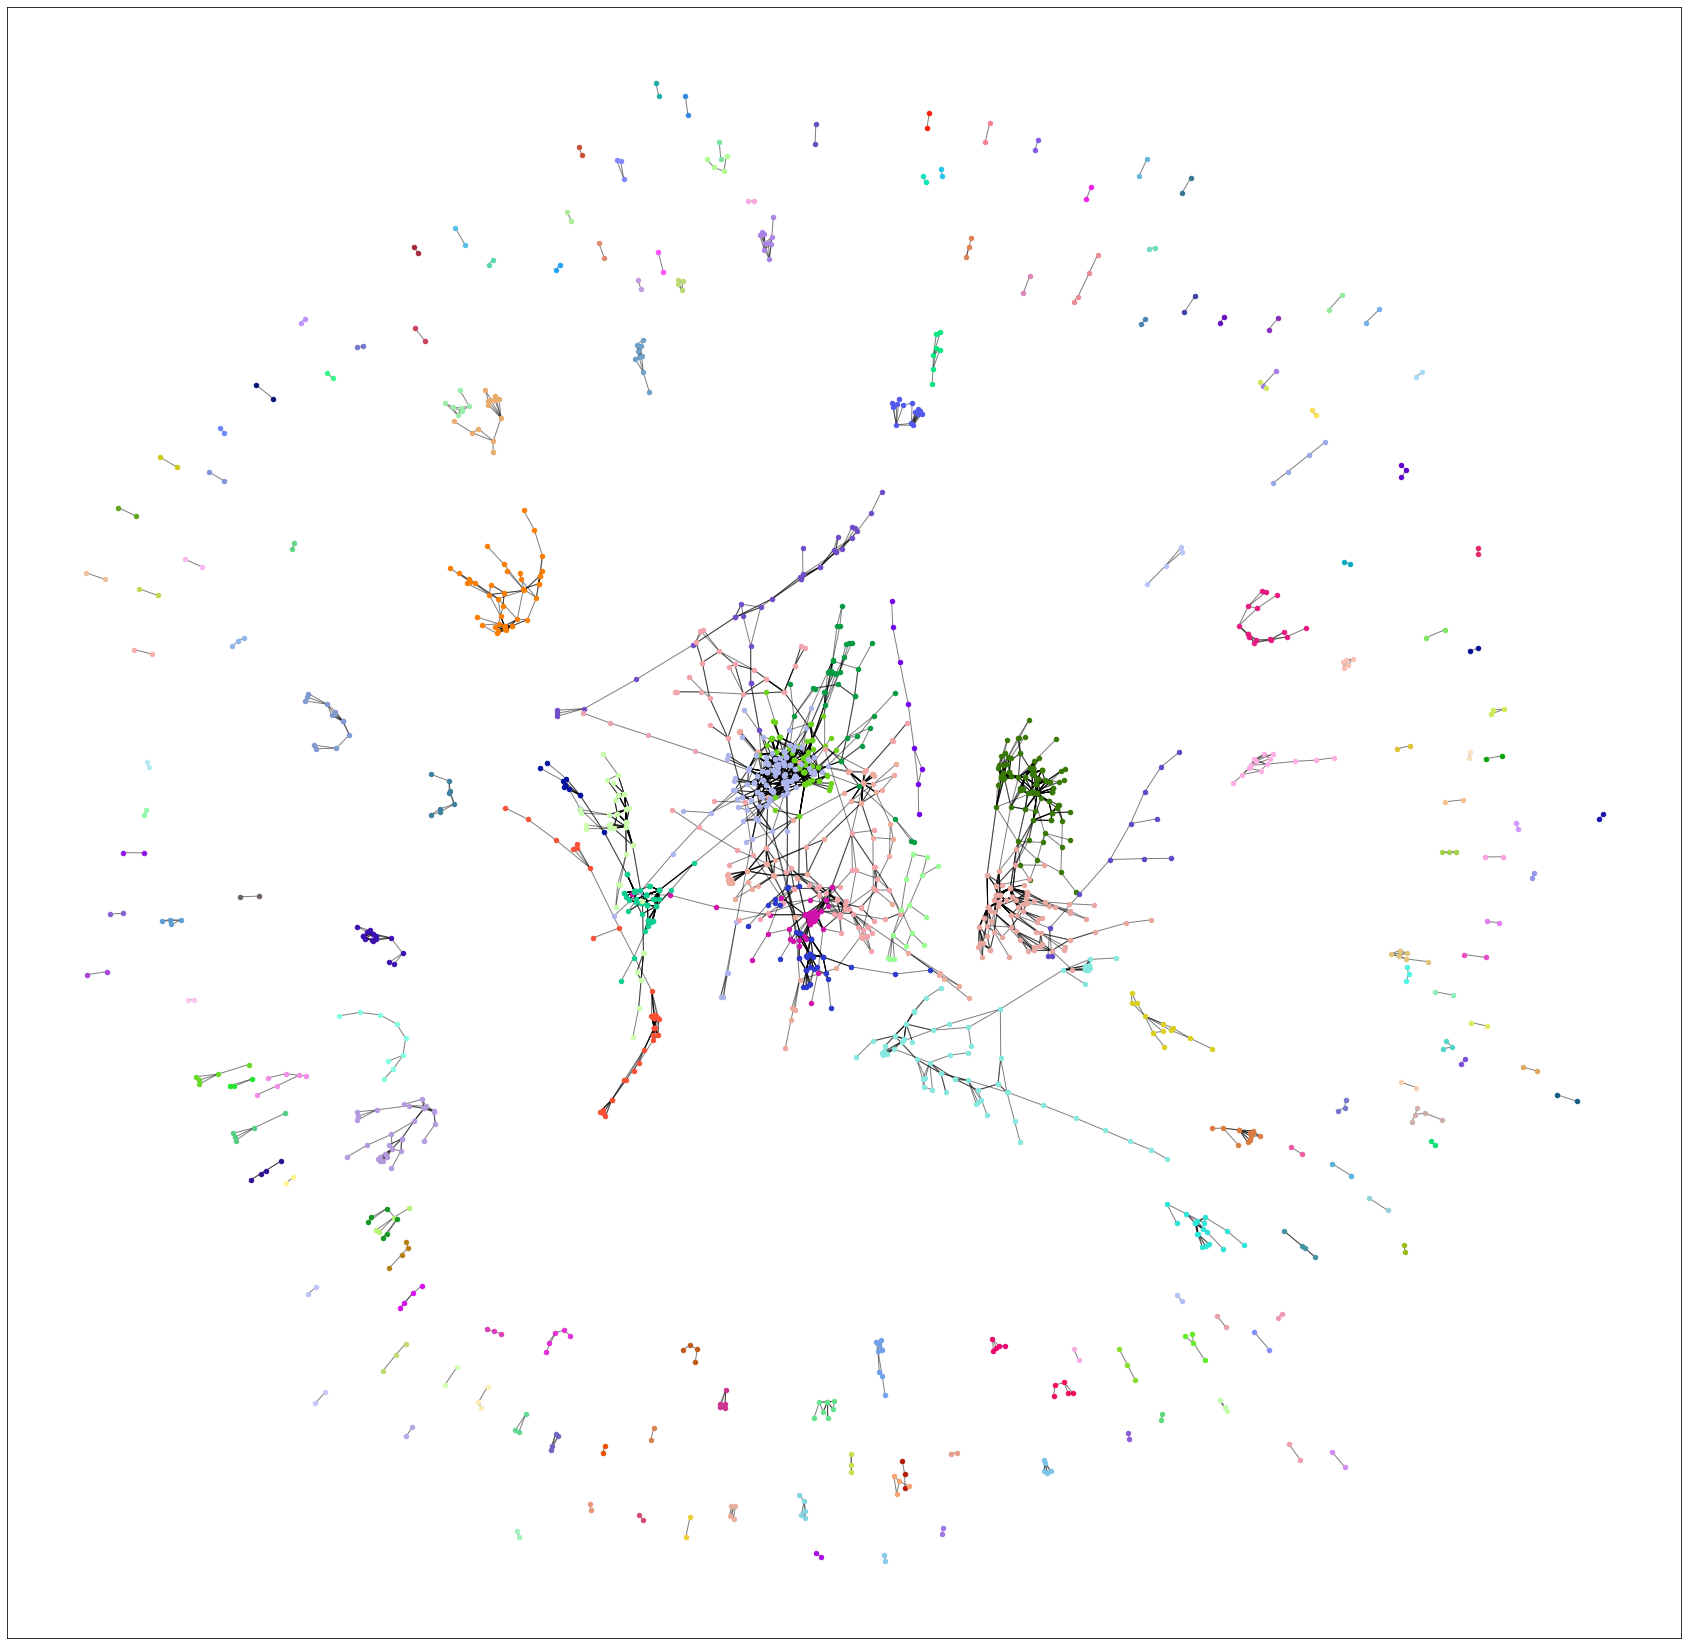

In [7]:
#drawing
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()